In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
PATH = "/content/drive/MyDrive/datasets/kaggle/scrabble-player-rating"
df_games = pd.read_csv(PATH + "/games.csv")
df_sample_submission = pd.read_csv(PATH + "/sample_submission.csv")
df_test = pd.read_csv(PATH + "/test.csv")
df_train = pd.read_csv(PATH + "/train.csv")
df_turns = pd.read_csv(PATH + "/turns.csv")

In [ ]:
df_turns['points_per_symb'] = df_turns.points / df_turns.move.apply(lambda x: len(str(x)))

In [ ]:
df_turns[df_turns.nickname == "JaneinLondon"]

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type,points_per_symb


In [ ]:
df_turns[df_turns.game_id==673]

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
18429,673,1,HastyBot,EIIIKSU,NaN,-IIKU,0,0,Exchange
18430,673,2,BB-8,EFLNNWX,NaN,-LNW,0,0,Exchange
18431,673,3,HastyBot,BCEIINS,8G,BI,8,8,Play
18432,673,4,BB-8,EEEFNTX,9F,FETE,16,16,Play
18433,673,5,HastyBot,CDEEINS,J8,ED,12,20,Play
18434,673,6,BB-8,AEKLNQX,I5,ANKL.,20,36,Play
18435,673,7,HastyBot,CEINPSY,H1,SPICY,50,70,Play
18436,673,8,BB-8,AEGIQSX,NaN,-GIQ,0,36,Exchange
18437,673,9,HastyBot,AEEHNOW,10C,WHOA,19,89,Play
18438,673,10,BB-8,AAEISTX,11D,AX,41,77,Play


In [ ]:
df_games.head()

,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
1,2,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418
2,3,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262
3,4,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141
4,5,STEEBot,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722


In [ ]:
df_games[(df_games.first in ["BetterBot","STEEBot","HastyBot"]) & (df_games.winner == 0)]['winner_bot'] = 'bot'
df_games[(df_games.first in ["BetterBot","STEEBot","HastyBot"]) & (df_games.winner == 1)]['winner_bot'] = 'notbot'
df_games.loc[(df_games.first not in ["BetterBot","STEEBot","HastyBot"]) & (df_games.winner == 0),'winner_bot'] = 'notbot'
df_games.loc[(df_games.first not in ["BetterBot","STEEBot","HastyBot"]) & (df_games.winner == 1),'winner_bot'] = 'bot'
df_games.loc[(df_games.winner_bot.isna()),'winner_bot'] = 'other'

In [ ]:
df_train.head()

,game_id,nickname,score,rating
0,1,BetterBot,335,1637
1,1,stevy,429,1500
2,3,davidavid,440,1811
3,3,BetterBot,318,2071
4,4,Inandoutworker,119,1473


In [ ]:
df_train_1half = df_train.iloc[1::2]
df_train_2half = df_train.iloc[::2]
df_train_joined = pd.merge(left=df_train_1half, right=df_train_2half,on='game_id')

In [ ]:
df_test_1half = df_test.iloc[1::2]
df_test_2half = df_test.iloc[::2]
df_test_joined = pd.merge(left=df_test_1half, right=df_test_2half,on='game_id')

In [ ]:
def swapValues(df, cols_name):
    df_local = df.copy()
    botList = ["BetterBot","STEEBot","HastyBot"]
    df_local['flag'] = ~df_local.nickname_x.isin(botList)
    
    for col_name in cols_name:
        col_x = col_name + '_x'
        col_y = col_name + '_y'

        df_local['temp'] = df_local[col_x]
        
        df_local.loc[df_local.flag == True,col_x] = df_local[df_local.flag == True][col_y]
        df_local.loc[df_local.flag == True,col_y] = df_local[df_local.flag == True].temp

    df_local.drop(columns=['temp','flag'],axis=1,inplace=True)
    # df = 0
    return df_local

In [ ]:
df_train_joined = swapValues(df_train_joined, ['score','rating','nickname'])
df_test_joined = swapValues(df_test_joined, ['score','rating','nickname'])

In [ ]:
df_train_joined.head()

,game_id,nickname_x,score_x,rating_x,nickname_y,score_y,rating_y
0,1,BetterBot,335,1637,stevy,429,1500
1,3,BetterBot,318,2071,davidavid,440,1811
2,4,BetterBot,478,1936,Inandoutworker,119,1473
3,5,STEEBot,427,1844,stevy,325,1500
4,6,STEEBot,427,2143,HivinD,378,2029


In [ ]:
df_turns_remaked = df_turns.groupby(["game_id","nickname"]).agg(
    points_mean=('points','mean'),
    points_max=('points','max'),
    turn_number = ('turn_number','max'),
    points_per_symb = ('points_per_symb','mean'))

In [ ]:
df_turns_remaked.columns = df_turns_remaked.columns.droplevel(0)
# df_turns_remaked.reset_index(inplace=True)

In [ ]:
df_turns_remaked.head()

,game_id,nickname,points,points,turn_number,points_per_symb
0,1,BetterBot,25.769231,68,25,6.042125
1,1,stevy,30.642857,98,27,7.773980
2,2,BetterBot,33.416667,85,24,5.967460
3,2,Super,34.857143,94,26,8.023724
4,3,BetterBot,24.461538,76,25,5.645421


In [ ]:
df_turns_remaked_1half = df_turns_remaked.iloc[1::2]
df_turns_remaked_2half = df_turns_remaked.iloc[::2]
df_turns_remaked_joined = pd.merge(left=df_turns_remaked_1half, right=df_turns_remaked_2half,on='game_id')

In [ ]:
df_turns_remaked_joined['move_number'] = df_turns_remaked_joined['turn_number_x'] + df_turns_remaked_joined['turn_number_y']

In [ ]:
df_turns_remaked_joined.drop(columns=['turn_number_x','turn_number_y'],axis=1,inplace=True)

In [ ]:
df_turns_remaked_joined.head()

,game_id,nickname_x,points_x,points_per_symb_x,score_x,nickname_y,points_y,points_per_symb_y,score_y,move_number
0,1,stevy,32.846154,8.320696,427,BetterBot,25.769231,6.042125,335,51
1,2,Super,44.181818,10.151407,486,BetterBot,33.416667,5.967460,401,49
2,3,davidavid,31.692308,8.212637,412,BetterBot,26.500000,6.115873,318,51
3,4,Inandoutworker,9.916667,3.381944,119,BetterBot,31.866667,6.456429,478,57
4,5,stevy,22.928571,8.315476,321,STEEBot,28.466667,6.131799,427,59


In [ ]:
df_turns_remaked_joined = swapValues(df_turns_remaked_joined, ['points','nickname','points_per_symb'])

In [ ]:
df_turns_remaked_joined.head()

,game_id,nickname_x,points_x,points_per_symb_x,nickname_y,points_y,points_per_symb_y,move_number
0,1,BetterBot,25.769231,6.042125,stevy,32.846154,8.320696,51
1,2,BetterBot,33.416667,5.967460,Super,44.181818,10.151407,49
2,3,BetterBot,26.500000,6.115873,davidavid,31.692308,8.212637,51
3,4,BetterBot,31.866667,6.456429,Inandoutworker,9.916667,3.381944,57
4,5,STEEBot,28.466667,6.131799,stevy,22.928571,8.315476,59


In [ ]:
df_train_joined = pd.merge(left=df_train_joined,right=df_turns_remaked_joined,on=['game_id','nickname_x','nickname_y'])
df_test_joined = pd.merge(left=df_test_joined,right=df_turns_remaked_joined,on=['game_id','nickname_x','nickname_y'])

In [ ]:
df_turns_remaked_joined.head()

,game_id,nickname_x,points_x,points_per_symb_x,nickname_y,points_y,points_per_symb_y,move_number
0,1,BetterBot,25.769231,6.042125,stevy,32.846154,8.320696,51
1,2,BetterBot,33.416667,5.967460,Super,44.181818,10.151407,49
2,3,BetterBot,26.500000,6.115873,davidavid,31.692308,8.212637,51
3,4,BetterBot,31.866667,6.456429,Inandoutworker,9.916667,3.381944,57
4,5,STEEBot,28.466667,6.131799,stevy,22.928571,8.315476,59


In [ ]:
df_train_game_join = pd.merge(left=df_train_joined,right=df_games,on='game_id')
df_test_game_join = pd.merge(left=df_test_joined,right=df_games,on='game_id')

In [ ]:
df_train_game_join.head()

,game_id,nickname_x,score_x,rating_x,nickname_y,score_y,rating_y,points_x,points_per_symb_x,points_y,...,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,winner_bot
0,1,BetterBot,335,1637,stevy,429,1500,25.769231,6.042125,32.846154,...,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,bot
1,3,BetterBot,318,2071,davidavid,440,1811,26.500000,6.115873,31.692308,...,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262,bot
2,4,BetterBot,478,1936,Inandoutworker,119,1473,31.866667,6.456429,9.916667,...,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141,notbot
3,5,STEEBot,427,1844,stevy,325,1500,28.466667,6.131799,22.928571,...,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722,notbot
4,6,STEEBot,427,2143,HivinD,378,2029,37.909091,7.330411,31.500000,...,STANDARD,0,2022-08-21 14:56:35,CSW21,900,0,RATED,1,426.950541,notbot


Try use stats of player 2

does not work because there are no players from the training sample in the test sample

In [ ]:
# df_train_game_join = df_train_game_join.sort_values(by='created_at')
# df_test_game_join = df_test_game_join.sort_values(by='created_at')
# df_train_game_join_uniq = df_train_game_join.nickname_y.unique()
# df_test_game_join_uniq = df_test_game_join.nickname_y.unique()
# df_train_game_join.reset_index(inplace=True)
# df_test_game_join.reset_index(inplace=True)

In [ ]:
# dict_uniq_train = dict((el,0) for el in df_train_game_join_uniq)
# df_train_game_join['current_num_games'] = 0
# for i in tqdm(range(len(df_train_game_join))):
#     local_nick = df_train_game_join.nickname_y.iloc[i]
#     dict_uniq_train[local_nick] += 1
#     df_train_game_join.loc[i,'current_num_games'] = dict_uniq_train[local_nick]

In [ ]:
# dict_uniq_test = dict((el,0) for el in df_test_game_join_uniq)
# df_test_game_join['current_num_games'] = 0
# for i in tqdm(range(len(df_test_game_join))):
#     local_nick = df_test_game_join.nickname_y.iloc[i]
#     dict_uniq_test[local_nick] += 1
#     df_test_game_join.loc[i,'current_num_games'] = dict_uniq_test[local_nick]

100%|██████████| 22363/22363 [00:07<00:00, 2908.46it/s]


In [ ]:
def prepare4model(df):
    df_local = df.copy()
    botList = ["BetterBot","STEEBot","HastyBot"]
    df_local['first'] = df_local['first'].apply(lambda x: "bot" if x in botList else "notbot")
    df_local.nickname_x = df_local['nickname_x'].apply(lambda x: 0 if x == botList[0] else "1" if x == botList[1] else "2")
    col2del = ['winner','initial_time_seconds','increment_seconds','game_id']
    # col2del = ['created_at','nickname_y','initial_time_seconds','increment_seconds','game_id']
    df_local.drop(columns=col2del,axis=1,inplace=True)
    return df_local

In [ ]:
df_train_final = prepare4model(df_train_game_join)
df_test_final = prepare4model(df_test_game_join)

In [ ]:
# df_test_final.drop(columns=['index'],axis=1,inplace=True)
# df_train_final.drop(columns=['index'],axis=1,inplace=True)

In [ ]:
df_train_final.columns

Index(['nickname_x', 'score_x', 'rating_x', 'nickname_y', 'score_y',
       'rating_y', 'points_x', 'points_per_symb_x', 'points_y',
       'points_per_symb_y', 'move_number', 'first', 'time_control_name',
       'game_end_reason', 'created_at', 'lexicon', 'rating_mode',
       'max_overtime_minutes', 'game_duration_seconds', 'winner_bot'],
      dtype='object')

try catboost

In [ ]:
!pip install catboost --quiet

     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, log_loss

In [ ]:
model = CatBoostRegressor(
    # l2_leaf_reg = 0.5,
    # learning_rate = 0.01,
    iterations = 1300,
    random_seed = 42,
    depth = 5,
    # cat_features=['nickname_x','lexicon','rating_mode','time_control_name','']
    cat_features=['nickname_x','first','time_control_name','game_end_reason','lexicon','rating_mode','winner_bot']
)

In [ ]:
df_train_final.loc[df_train_final.score_x == df_train_final.score_x,'winner_bot'] = "draw"
df_test_final.loc[df_test_final.score_x == df_test_final.score_x,'winner_bot'] = "draw"

In [ ]:
X = df_train_final.drop(columns=['rating_y','created_at','nickname_y'],axis=1)
y = df_train_final.rating_y
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=1/3, random_state=42)

In [ ]:
model.fit(X_train,y_train,eval_set=(X_test,y_test),verbose=50)

Learning rate set to 0.075338
0:	learn: 220.1697391	test: 218.5995080	best: 218.5995080 (0)	total: 58.2ms	remaining: 1m 15s
50:	learn: 128.4130430	test: 127.9680170	best: 127.9680170 (50)	total: 1.4s	remaining: 34.4s
100:	learn: 123.6438835	test: 123.9583665	best: 123.9583665 (100)	total: 2.47s	remaining: 29.3s
150:	learn: 120.9960834	test: 121.9748564	best: 121.9748564 (150)	total: 3.63s	remaining: 27.6s
200:	learn: 119.0761202	test: 120.6808898	best: 120.6808898 (200)	total: 4.74s	remaining: 25.9s
250:	learn: 117.5372893	test: 119.6947409	best: 119.6947409 (250)	total: 5.83s	remaining: 24.3s
300:	learn: 116.5640359	test: 119.2774555	best: 119.2774555 (300)	total: 6.94s	remaining: 23s
350:	learn: 115.6755223	test: 118.9105568	best: 118.9105568 (350)	total: 8.02s	remaining: 21.7s
400:	learn: 114.8949537	test: 118.6240855	best: 118.6240855 (400)	total: 9.12s	remaining: 20.4s
450:	learn: 114.2478540	test: 118.3645090	best: 118.3645090 (450)	total: 10.2s	remaining: 19.1s
500:	learn: 113.5

In [ ]:
rating_y_pred = model.predict(X_test)
rating_ytr_pred = model.predict(X_train)

In [ ]:
mean_squared_error(y_train,rating_ytr_pred,squared=False)

99.6133745231418

In [ ]:
mean_squared_error(y_test,rating_y_pred,squared=False)

117.63430267581538

Frequent player ratings

In [ ]:
y_pred = model.predict(df_test_final.drop(columns=['first','winner','game_end_reason','rating_y','created_at','nickname_y'],axis=1))

In [ ]:
df_test_final['rating_pred'] = y_pred

In [ ]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


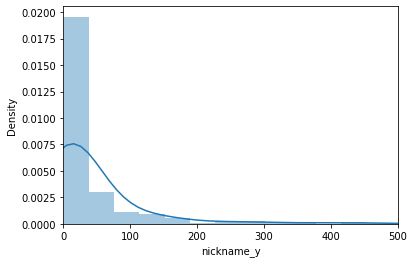

In [ ]:
plt.xlim(0,500)
sns.distplot(df_test_final.nickname_y.value_counts())

In [ ]:
df_test_final_copy = df_test_final.copy()

In [ ]:
df_test_final_copy[df_test_final_copy.modified_rating != 0]

,nickname_x,score_x,rating_x,nickname_y,score_y,rating_y,points_x,points_per_symb_x,points_y,points_per_symb_y,...,game_end_reason,winner,created_at,lexicon,rating_mode,max_overtime_minutes,game_duration_seconds,rating_pred,modified_rating,index1
0,0,335,1637,stevy,429,1500,25.769231,6.042125,30.642857,7.773980,...,STANDARD,1,2022-08-26 03:38:49,NWL20,CASUAL,1,674.844274,1602.391848,1593.143590,0
1,0,318,2071,davidavid,440,1811,24.461538,5.645421,31.428571,7.911735,...,STANDARD,1,2022-09-04 08:04:27,CSW21,RATED,5,492.268262,1994.084963,1891.032297,1
2,0,478,1936,Inandoutworker,119,1473,31.866667,6.456429,8.500000,2.898810,...,RESIGNED,0,2022-09-12 02:36:19,CSW21,CASUAL,1,350.861141,1479.250640,1603.367144,2
3,1,427,1844,stevy,325,1500,28.466667,6.131799,20.312500,7.338542,...,STANDARD,0,2022-09-06 04:31:36,NWL20,CASUAL,1,642.688722,1557.067227,1573.551868,3
4,1,427,2143,HivinD,378,2029,32.846154,6.356502,31.500000,6.718056,...,STANDARD,0,2022-08-21 14:56:35,CSW21,RATED,1,426.950541,2011.432585,2011.432585,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50405,0,414,1952,HAYDEN,340,1395,25.875000,5.716518,21.250000,6.307887,...,TIME,0,2022-09-05 04:35:56,CSW21,CASUAL,1,3669.988413,1503.884504,1534.096891,50405
50406,2,590,2237,samsiah06,97,1332,36.875000,7.218899,6.062500,2.276042,...,TIME,0,2022-09-04 00:13:24,CSW21,RATED,1,3662.659287,1253.425463,1281.911176,50406
50407,2,393,1614,BB-8,390,1500,26.200000,6.026667,24.375000,5.968601,...,STANDARD,0,2022-09-19 03:28:44,ECWL,CASUAL,10,236.133634,1502.730487,1500.580953,50407
50408,0,442,1674,Gtowngrad,388,1364,31.571429,7.675340,24.250000,7.173735,...,STANDARD,0,2022-08-31 15:57:38,NWL20,RATED,1,681.370077,1598.121484,1578.982596,50408


In [ ]:
df_test_final_copy.nickname_y.value_counts()

hannahbanana      1884
marvin            1233
Eloquent          1041
hulkbuster         687
friesbasil         528
                  ... 
Thejana123           1
Scrabblerid          1
Mickey               1
IMMORTAL141414       1
groveringu           1
Name: nickname_y, Length: 440, dtype: int64

In [ ]:
df_test_final_copy

,nickname_x,score_x,rating_x,nickname_y,score_y,rating_y,points_x,points_per_symb_x,points_y,points_per_symb_y,...,winner,created_at,lexicon,rating_mode,max_overtime_minutes,game_duration_seconds,rating_pred,modified_rating,index1,modified_rating2
0,0,335,1637,stevy,429,1500,25.769231,6.042125,30.642857,7.773980,...,1,2022-08-26 03:38:49,NWL20,CASUAL,1,674.844274,1602.391848,1593.143590,0,1586.725423
1,0,318,2071,davidavid,440,1811,24.461538,5.645421,31.428571,7.911735,...,1,2022-09-04 08:04:27,CSW21,RATED,5,492.268262,1994.084963,1891.032297,1,1896.996854
2,0,478,1936,Inandoutworker,119,1473,31.866667,6.456429,8.500000,2.898810,...,0,2022-09-12 02:36:19,CSW21,CASUAL,1,350.861141,1479.250640,1603.367144,2,1609.471454
3,1,427,1844,stevy,325,1500,28.466667,6.131799,20.312500,7.338542,...,0,2022-09-06 04:31:36,NWL20,CASUAL,1,642.688722,1557.067227,1573.551868,3,1575.836268
4,1,427,2143,HivinD,378,2029,32.846154,6.356502,31.500000,6.718056,...,0,2022-08-21 14:56:35,CSW21,RATED,1,426.950541,2011.432585,2011.432585,4,1978.685820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50405,0,414,1952,HAYDEN,340,1395,25.875000,5.716518,21.250000,6.307887,...,0,2022-09-05 04:35:56,CSW21,CASUAL,1,3669.988413,1503.884504,1534.096891,50405,1579.193536
50406,2,590,2237,samsiah06,97,1332,36.875000,7.218899,6.062500,2.276042,...,0,2022-09-04 00:13:24,CSW21,RATED,1,3662.659287,1253.425463,1281.911176,50406,1285.358504
50407,2,393,1614,BB-8,390,1500,26.200000,6.026667,24.375000,5.968601,...,0,2022-09-19 03:28:44,ECWL,CASUAL,10,236.133634,1502.730487,1500.580953,50407,1500.458965
50408,0,442,1674,Gtowngrad,388,1364,31.571429,7.675340,24.250000,7.173735,...,0,2022-08-31 15:57:38,NWL20,RATED,1,681.370077,1598.121484,1578.982596,50408,1554.005314


In [ ]:
df_test_final_copy['modified_rating'] = df_test_final_copy['rating_pred']
df_test_final_copy['modified_rating2'] = df_test_final_copy['rating_pred']
df_test_final_copy['index1'] = df_test_final_copy.index
window_len = 2
for nname in tqdm(df_test_final_copy.nickname_y.unique()):
    test_df = df_test_final_copy[['nickname_y','rating_y','rating_pred','created_at']][df_test_final_copy.nickname_y == nname].sort_values(by='created_at')
    test_df.reset_index(inplace=True)
    if len(test_df) >= window_len*2 + 1:
        
        test_df.loc[0,'modified_rating'] = np.median(test_df.iloc[:2].rating_y)
        test_df.loc[len(test_df)-1,'modified_rating'] = np.median(test_df.iloc[-2:].rating_y)
        test_df.loc[0,'modified_rating2'] = np.mean(test_df.iloc[:2].rating_y)
        test_df.loc[len(test_df)-1,'modified_rating2'] = np.mean(test_df.iloc[-2:].rating_y)

        for i in range(window_len,len(test_df)-window_len):

            local_index = test_df.iloc[i]['index']
            rating_median = np.median(test_df.iloc[i-window_len:i+window_len+1].rating_pred)
            rating_mean = np.mean(test_df.iloc[i-window_len:i+window_len+1].rating_pred)
            
            test_df.loc[i,'modified_rating'] = rating_median
            test_df.loc[i,'modified_rating2'] = rating_mean
            df_test_final_copy.loc[local_index,'modified_rating'] = rating_median
            df_test_final_copy.loc[local_index,'modified_rating2'] = rating_mean
    

100%|██████████| 440/440 [00:40<00:00, 10.75it/s] 


In [ ]:
tmp4plot = df_test_final_copy[['nickname_y','rating_y','rating_pred','modified_rating','modified_rating2','created_at']][df_test_final_copy.nickname_y == "Eloquent"].sort_values(by='created_at') 

In [ ]:
tmp4plot.modified_rating2

10597    1761.884010
506      1799.179145
17910    1822.211085
20555    1840.816534
13794    1845.523512
            ...     
7756     1830.944706
18713    1842.183419
13822    1861.419579
4010     1852.859359
2497     1909.465908
Name: modified_rating2, Length: 1041, dtype: float64

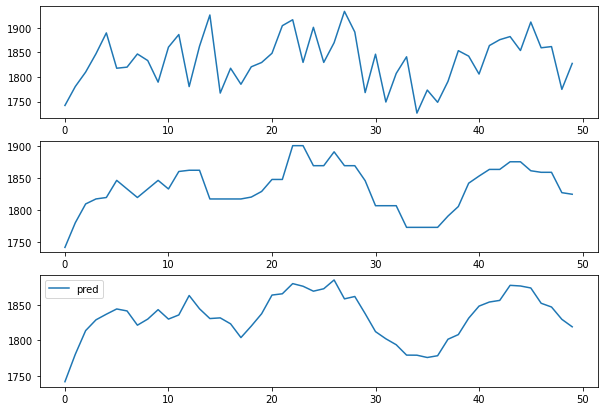

In [ ]:
df_test_final_copy_4plot = tmp4plot[0:50]
fig, axs = plt.subplots(3,1,figsize=(10,7))
# axs[0,0].plot(range(len(df_test_final_copy_4plot)),df_test_final_copy_4plot.rating_y)
axs[0].plot(range(len(df_test_final_copy_4plot)),df_test_final_copy_4plot.rating_pred)
# axs[1,0].plot(range(len(df_test_final_copy_4plot)),df_test_final_copy_4plot.modified_rating)
axs[1].plot(range(len(df_test_final_copy_4plot)),df_test_final_copy_4plot.modified_rating)
axs[2].plot(range(len(df_test_final_copy_4plot)),df_test_final_copy_4plot.modified_rating2)
plt.legend(['pred','window_median','window_mean'])


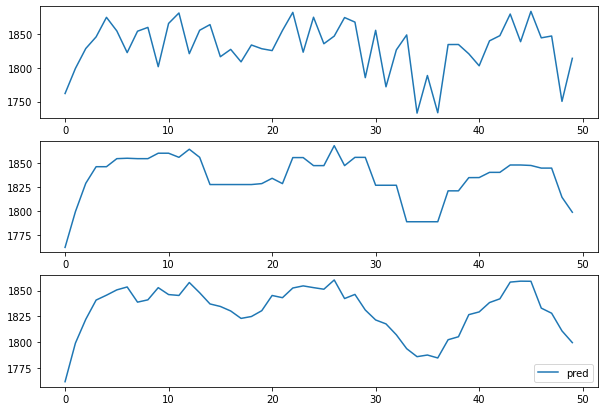

In [ ]:
df_test_final_copy_4plot = tmp4plot[0:50]
fig, axs = plt.subplots(3,1,figsize=(10,7))
# axs[0,0].plot(range(len(df_test_final_copy_4plot)),df_test_final_copy_4plot.rating_y)
axs[0].plot(range(len(df_test_final_copy_4plot)),df_test_final_copy_4plot.rating_pred)
# axs[1,0].plot(range(len(df_test_final_copy_4plot)),df_test_final_copy_4plot.modified_rating)
axs[1].plot(range(len(df_test_final_copy_4plot)),df_test_final_copy_4plot.modified_rating)
axs[2].plot(range(len(df_test_final_copy_4plot)),df_test_final_copy_4plot.modified_rating2)
plt.legend(['pred','window_median','window_mean'])


In [ ]:
mean_squared_error(tmp4plot.rating_y,tmp4plot.rating_pred,squared=False)

66.28372172752553

In [ ]:
mean_squared_error(tmp4plot.rating_y,tmp4plot.modified_rating,squared=False)

46.70476515370264

In [ ]:
mean_squared_error(tmp4plot.rating_y,tmp4plot.modified_rating2,squared=False)

42.64695317327612

create submission file

In [ ]:
df_test_final_copy.columns

Index(['nickname_x', 'score_x', 'rating_x', 'nickname_y', 'score_y',
       'rating_y', 'points_x', 'points_per_symb_x', 'points_y',
       'points_per_symb_y', 'move_number', 'first', 'time_control_name',
       'game_end_reason', 'winner', 'created_at', 'lexicon', 'rating_mode',
       'max_overtime_minutes', 'game_duration_seconds', 'rating_pred',
       'modified_rating', 'index1'],
      dtype='object')

In [ ]:
y_pred = model.predict(df_test_final.drop(columns=['winner','first','game_end_reason','rating_y','created_at','nickname_y'],axis=1))

In [ ]:
pd.DataFrame({'imp':model.feature_importances_,
              'cols':X_train.columns}).sort_values(by='imp',ascending=False)

,imp,cols
10,18.463756,lexicon
11,14.934847,rating_mode
6,13.822946,points_y
2,12.458537,rating_x
13,9.785362,game_duration_seconds
3,9.465633,score_y
9,5.793939,time_control_name
0,3.521584,nickname_x
12,3.321809,max_overtime_minutes
8,2.544850,move_number


In [ ]:
y_pred[0:60]

array([2042.02458741, 1995.4282278 , 1636.02501914, 1951.04185722,
       2072.89443966, 1897.41917092, 2022.79189966, 1662.32389581,
       1743.68264766, 1656.14764828, 1822.9698929 , 1830.18178893,
       1699.31439303, 1962.59127953, 1908.71654701, 2005.21846534,
       1825.92863755, 1859.36441312, 1835.93130853, 1811.95810848,
       1592.73565323, 1973.57175179, 1484.53352235, 1673.59334883,
       1814.41742861, 1681.54692398, 1995.86381556, 1891.27424712,
       1814.49169428, 1809.31774292, 1684.60019875, 1979.42496124,
       1816.90467633, 1819.08112564, 2007.84373653, 1789.99600418,
       2021.56179273, 1659.90923885, 1911.23611303, 1708.75709897,
       2066.62741304, 1378.51170297, 2031.95681245, 1852.96605678,
       1945.49447979, 1880.36872892, 1870.87167288, 1982.2924875 ,
       1861.53009115, 1851.34294939, 1736.05216235, 2001.70070645,
       1927.93252106, 1955.6757717 , 1736.09090249, 1747.08260556,
       1821.56739988, 2014.55921731, 1808.42969051, 1978.03363

In [ ]:
df_submission = pd.DataFrame({
    'game_id':df_test_joined.game_id,
    'rating':df_test_final_copy.modified_rating2
    })

In [ ]:
df_submission

,game_id,rating
0,2,1925.993149
1,7,1984.378408
2,11,1627.752974
3,14,1945.557623
4,27,2038.072878
...,...,...
22358,72760,1979.509786
22359,72761,1801.122801
22360,72762,1531.144235
22361,72768,2033.882650


In [ ]:
df_submission.to_csv("sumbition_09.12.2022_2.csv",index=False)

shap

In [ ]:
!pip install shap --quiet
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 7.6 MB/s 


In [ ]:
df_train_final.columns

Index(['nickname_x', 'score_x', 'rating_x', 'score_y', 'rating_y', 'points_x',
       'points_per_symb_x', 'points_y', 'points_per_symb_y', 'move_number',
       'first', 'time_control_name', 'game_end_reason', 'winner', 'lexicon',
       'rating_mode', 'max_overtime_minutes', 'game_duration_seconds'],
      dtype='object')

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

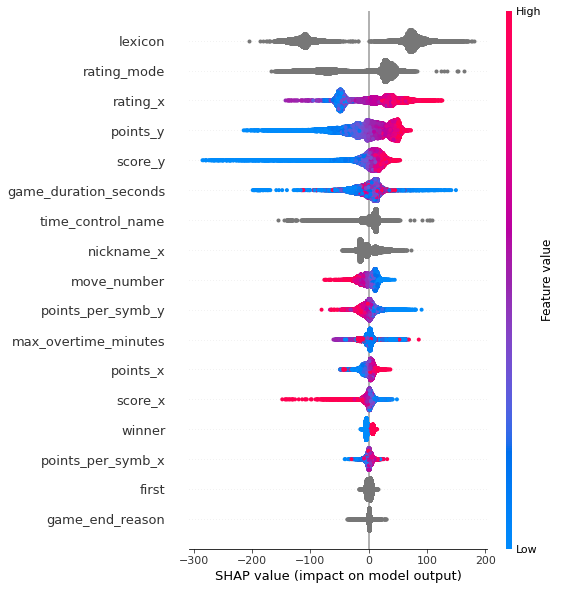

In [ ]:
shap.summary_plot(shap_values, X_train)